# Analyzing Risk Factors for Heart Disease: Insights from Health Data

 ### 1. Load Data and Check Unique Values
 
 Memuat dataset dan memahami struktur data.

In [43]:
import pandas as pd

# Load dataset
data = pd.read_csv(r"C:\Users\Legion 5\Downloads\CVD_cleaned.csv")  # Ganti dengan path yang sesuai
print(data.head())  # Menampilkan 5 baris pertama dari dataset
print(data.info())  # Menampilkan informasi tentang kolom, tipe data, dan jumlah non-null

# Periksa nilai unik pada kolom-kolom penting
print("Unique values in 'Heart_Disease':", data['Heart_Disease'].unique())
print("Unique values in 'Exercise':", data['Exercise'].unique())
print("Unique values in 'Smoking_History':", data['Smoking_History'].unique())


  General_Health                  Checkup Exercise Heart_Disease Skin_Cancer  \
0           Poor  Within the past 2 years       No            No          No   
1      Very Good     Within the past year       No           Yes          No   
2      Very Good     Within the past year      Yes            No          No   
3           Poor     Within the past year      Yes           Yes          No   
4           Good     Within the past year       No            No          No   

  Other_Cancer Depression Diabetes Arthritis     Sex Age_Category  \
0           No         No       No       Yes  Female        70-74   
1           No         No      Yes        No  Female        70-74   
2           No         No      Yes        No  Female        60-64   
3           No         No      Yes        No    Male        75-79   
4           No         No       No        No    Male          80+   

   Height_(cm)  Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  \
0        150.0        32.66  

### 2. Convert Category Values to Numeric

Convert the 'Yes' and 'No' category values to numeric for further analysis.

In [45]:
# Mapping 'Yes' to 1 and 'No' to 0
data['Heart_Disease'] = data['Heart_Disease'].map({'Yes': 1, 'No': 0})
data['Exercise'] = data['Exercise'].map({'Yes': 1, 'No': 0})
data['Smoking_History'] = data['Smoking_History'].map({'Yes': 1, 'No': 0})
data['Diabetes'] = data['Diabetes'].map({'Yes': 1, 'No': 0})
data['Arthritis'] = data['Arthritis'].map({'Yes': 1, 'No': 0})

# Recheck the unique value after mapping
print("Unique values in 'Heart_Disease' after mapping:", data['Heart_Disease'].unique())

Unique values in 'Heart_Disease' after mapping: [0 1]


### 3. Checking and Resolving NaN Values

Ensure there are no missing values (NaN) that will affect the analysis.

In [47]:
# Checking and Resolving NaN Values
print(data.isnull().sum())  # Display the number of NaN values for each column

# Drop rows with NaN in important columns
data_cleaned = data.dropna(subset=['Heart_Disease', 'BMI', 'Exercise', 'Smoking_History', 'Fruit_Consumption'])

# Check data size after cleaning
print(data_cleaned.shape)  # Display the dimensions of the cleaned dataset

General_Health                     0
Checkup                            0
Exercise                           0
Heart_Disease                      0
Skin_Cancer                        0
Other_Cancer                       0
Depression                         0
Diabetes                        9542
Arthritis                          0
Sex                                0
Age_Category                       0
Height_(cm)                        0
Weight_(kg)                        0
BMI                                0
Smoking_History                    0
Alcohol_Consumption                0
Fruit_Consumption                  0
Green_Vegetables_Consumption       0
FriedPotato_Consumption            0
dtype: int64
(308854, 19)


### 4. Analyzing the Data

 Conduct basic analysis to gain insights from the data.

In [49]:
# Calculating average BMI by heart disease
average_bmi = data_cleaned.groupby('Heart_Disease')['BMI'].mean()
print("Average BMI by Heart Disease:\n", average_bmi)

# Calculating the distribution of heart disease
heart_disease_distribution = data_cleaned['Heart_Disease'].value_counts()
print("Heart Disease Distribution:\n", heart_disease_distribution)

Average BMI by Heart Disease:
 Heart_Disease
0    28.543676
1    29.564505
Name: BMI, dtype: float64
Heart Disease Distribution:
 Heart_Disease
0    283883
1     24971
Name: count, dtype: int64


### 5. Visualization of Analysis Results

Using visualization to make data easier to understand.

C:\Users\Legion 5\AppData\Local\Temp\ipykernel_22572\1851428548.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Heart_Disease', data=data_cleaned, palette='Set2')


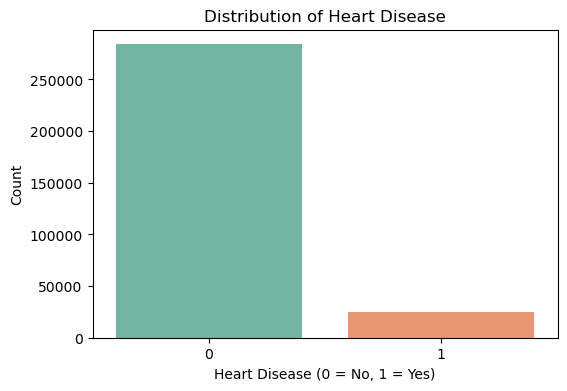

C:\Users\Legion 5\AppData\Local\Temp\ipykernel_22572\1851428548.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_bmi.index, y=average_bmi.values, palette='Set2')


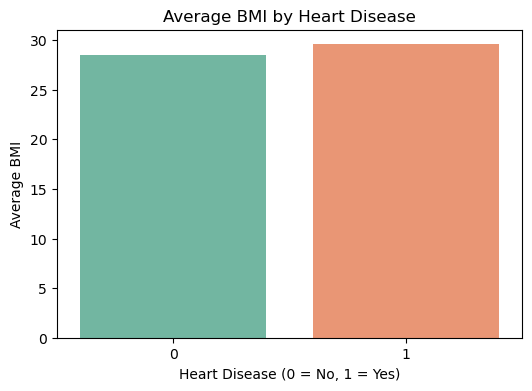

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi penyakit jantung
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart_Disease', data=data_cleaned, palette='Set2')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Visualisasi rata-rata BMI berdasarkan penyakit jantung
plt.figure(figsize=(6, 4))
sns.barplot(x=average_bmi.index, y=average_bmi.values, palette='Set2')
plt.title('Average BMI by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Average BMI')
plt.show()

In [53]:
# Check NaN
print(data.isnull().sum())

# Drop rows with NaN values in critical columns
data_cleaned = data.dropna(subset=['Heart_Disease', 'BMI', 'Fruit_Consumption'])

# Separate features and targets
X = data_cleaned[['BMI', 'Exercise', 'Smoking_History', 'Fruit_Consumption']]
y = data_cleaned['Heart_Disease']

General_Health                     0
Checkup                            0
Exercise                           0
Heart_Disease                      0
Skin_Cancer                        0
Other_Cancer                       0
Depression                         0
Diabetes                        9542
Arthritis                          0
Sex                                0
Age_Category                       0
Height_(cm)                        0
Weight_(kg)                        0
BMI                                0
Smoking_History                    0
Alcohol_Consumption                0
Fruit_Consumption                  0
Green_Vegetables_Consumption       0
FriedPotato_Consumption            0
dtype: int64


### 6. Building a Logistic Regression Model

Building a logistic regression model to predict heart disease risk.

Accuracy: 0.92


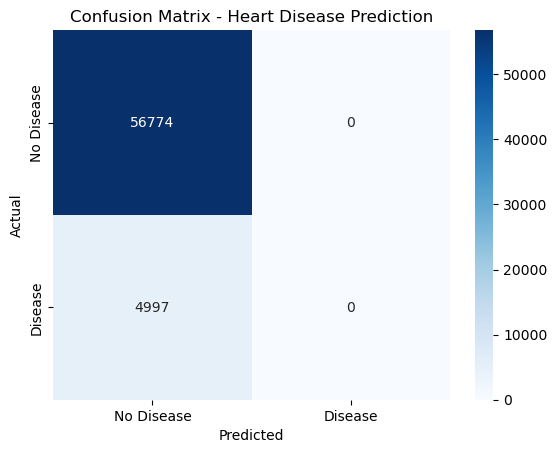

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Separating features and targets
X = data_cleaned[['BMI', 'Exercise', 'Smoking_History', 'Fruit_Consumption']]
y = data_cleaned['Heart_Disease']

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Making predictions
y_pred = log_reg.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Heart Disease Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 7. Relationship between BMI and Heart Disease

Displays the distribution of BMI by heart disease status. This can help identify outliers and understand the distribution of BMI.

C:\Users\Legion 5\AppData\Local\Temp\ipykernel_22572\3779597176.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart_Disease', y='BMI', data=data_cleaned, palette='Set2')


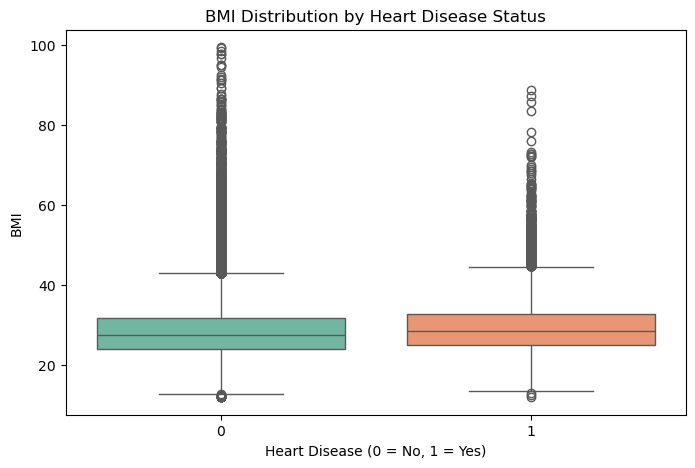

In [84]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Heart_Disease', y='BMI', data=data_cleaned, palette='Set2')
plt.title('BMI Distribution by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()

### 8.  Effect of Physical Activity on Heart Disease

Displays the proportion of individuals with and without heart disease by physical activity status.

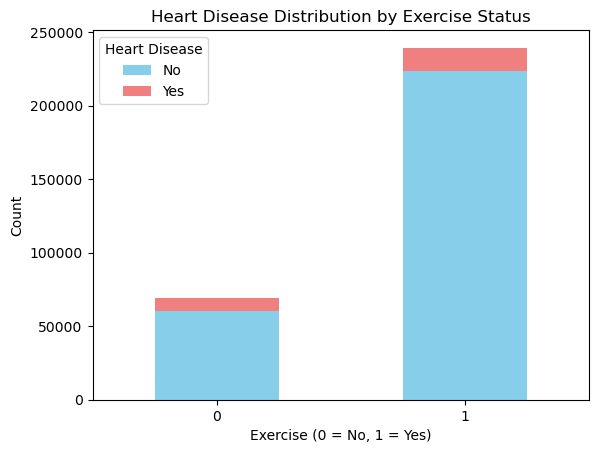

In [89]:
exercise_distribution = data_cleaned.groupby(['Exercise', 'Heart_Disease']).size().unstack()
exercise_distribution.plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.title('Heart Disease Distribution by Exercise Status')
plt.xlabel('Exercise (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

### 9. Relationship between Smoking and Heart Disease

Displays the number of patients with and without heart disease based on smoking history. This provides insight into how much influence smoking has on heart disease.

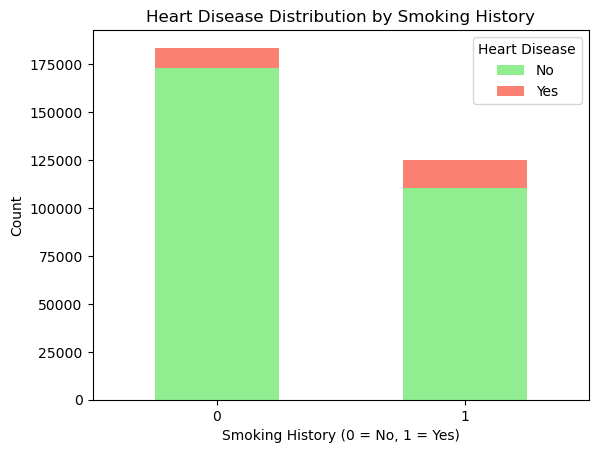

In [95]:
smoking_distribution = data_cleaned.groupby(['Smoking_History', 'Heart_Disease']).size().unstack()
smoking_distribution.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title('Heart Disease Distribution by Smoking History')
plt.xlabel('Smoking History (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()